# Naissance par jour de la semaine et par décennie aux USA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importation et préparation des données
### Importation
Les données brutes décrivent 15 547 observations.

In [2]:
births = pd.read_csv("births.csv")
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


### Nettoyage
On élimine en premier lieu les lignes contenant les **données manquantes**.

In [3]:
births = births.dropna()

On a pu remarqué dans le résumé plus haut la présence de valeurs abérantes pour la colonne **day** qui ne doit contenir que des valeurs entre 1 et 31. On ne garde pas les lignes qui vont au-delà.

In [4]:
births = births[births.day <= 31]

### Préparation
Notre domaine d'étude se concentre sur les trois décennies 1960, 1970 et 1980, donc on ne garde pas les **year** au-delà de 1989 *(fin de la décennie)* et au-dessous de 1960 *(déjà satisfait car __min(births.year) = 1969__)*

In [5]:
births = births[births.year <= 1989]

On ajoute une colonne **day_name** calculée à partir des year, month et day et contenant le nom du jour de la semaine correspondant à la date.
Enfin, pour notre étude, on a besoin que de year, births et day_name donc on les garde (*avec un dernier nettoyage*).

In [6]:
date = pd.DataFrame()
date['day_name'] = pd.to_datetime(births[["year", "month", "day"]], errors='coerce').dt.day_name()

births = pd.concat([births[["year", "births"]], date], axis =1).dropna()

Nos données sont à présent nettoyées te préparées pour être manipulées.
Voici les 5 premières lignes.

In [7]:
births.head()

,year,births,day_name
0,1969,4046,Wednesday
1,1969,4440,Wednesday
2,1969,4454,Thursday
3,1969,4548,Thursday
4,1969,4548,Friday


## Manipulation des données
Nous allons effectuer la somme des naissances en fonction des jours et de la décennie.
Donc premièrement, nous allons découper les années en 3 classes de 10 années.

In [8]:
decennie = pd.cut(births['year'], [1959, 1969, 1979, 1989], labels = ["1960", "1970", "1980"])
decennie.name = "Décennie"

Aggrégation des naissances avec un tableau croisé.

In [9]:
table = births.pivot_table('births', 'day_name', decennie, aggfunc="sum")
table

Décennie,1960,1970,1980
day_name,,,
Friday,531220,4992508,5069502
Monday,526638,4895418,4949739
Saturday,483710,4392927,4214867
Sunday,451604,4154367,4041017
Thursday,517742,4903588,5013476
Tuesday,549754,5090433,5173612
Wednesday,537910,4949892,5045584


Représentation graphique des résultats.

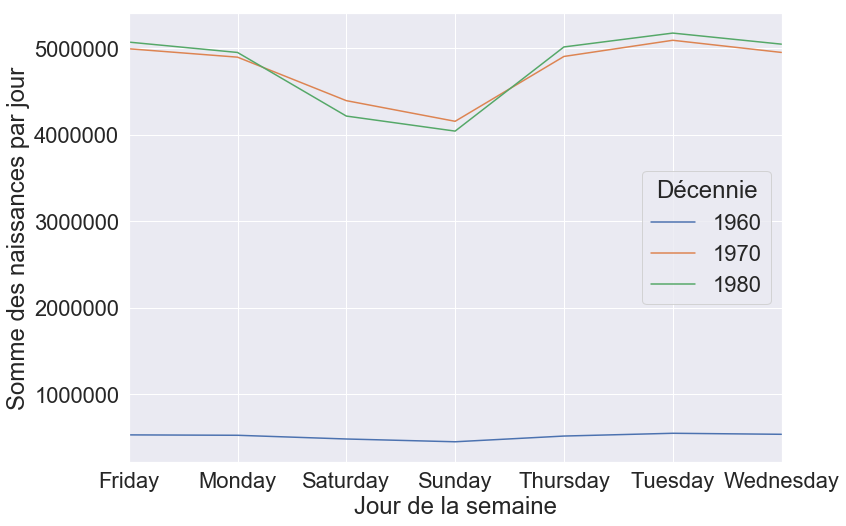

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2) # Figure plus grande
table.plot()
plt.ylabel('Somme des naissances par jour');
plt.xlabel('Jour de la semaine');
